<a href="https://colab.research.google.com/github/sam-thurman/asl_alphabet_image_classification/blob/master/notebooks/final/Final_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Mount to Google Drive and import required libraries

In [1]:
from google.colab import drive
# directory for drive to serve files from
drive.mount('/content/drive')
# verify it's you

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Append the Google Drive repository-specific path to the system path: should be the path to the root of the repository containing this notebook

In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
import sys
import os

# don't print annoying INFO and WARNING messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

sys.path.append('/content/drive/My\ Drive/asl_alphabet_image_classification/')

In [4]:
# change directory to notebook source code location
%cd drive/My\ Drive/asl_alphabet_image_classification/notebooks/src
from notebook_helpers import *

/content/drive/My Drive/asl_alphabet_image_classification/notebooks/src


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


#### Load in validation data

Path to validation data used for Keras ImageDataGenerator: check this is correct, should be fine as long as you followed repo set up instructions

In [5]:
validation_generator = load_val_generator('../../../data/asl_alphabet_validation')

Found 30 images belonging to 29 classes.


#### Edge detection quick look

this is the image shown to the classifier after all the preprocessing is done

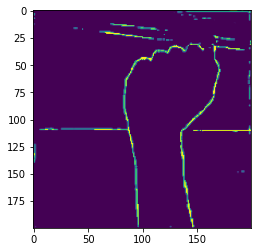

In [6]:
plt.imshow(array_to_img(validation_generator[0][0][0]))

#### Load in our classifier model

Path to classifier model: check this is correct, should be fine as long as you followed repo set up instructions

In [7]:
classifier = load_saved_model('../../models/model19.keras')

running
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 200, 200, 128)     1280      
_________________________________________________________________
dropout_4 (Dropout)          (None, 200, 200, 128)     0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5120000)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 29)                148480029 
Total params: 148,481,309
Trainable params: 148,481,309
Non-trainable params: 0
_________________________________________________________________
None


#### Evaluate

 Evaluate our model on our validation generator and print the accuracy and loss

In [8]:
evaluation = evaluate_model_on_gen(classifier, validation_generator)

Accuracy on 30 samples in given generator:  0.9333333373069763
Loss on 30 samples in given generator:  73.62454223632812


Get a results table with the actual and predicted image labels

In [9]:
results = predict_on_gen_and_report(classifier, validation_generator)
results

,True Labels,Predicted Labels
Sample Number,,
0,A,A
1,B,B
2,C,C
3,D,D
4,E,E
5,F,F
6,G,G
7,H,H
8,I,I
